Xarray extends the capabilities of NumPy by providing a data structure for labeled, multi-dimensional arrays. The two main data structures in Xarray are:

DataArray: A labeled, multi-dimensional array, which includes dimensions, coordinates, and attributes.

Dataset: A collection of DataArray objects that share the same dimensions.

![X array](https://docs.xarray.dev/en/stable/_images/dataset-diagram.png)

Xarray is particularly useful for working with datasets where dimensions have meaningful labels (e.g., time, latitude, longitude) and where metadata is important.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr

xr.set_options(display_style="html", keep_attrs=True, display_expand_data=False)

In [2]:
ds = xr.tutorial.open_dataset("air_temperature")
ds

<xarray.Dataset> Size: 31MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 31MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Working with DataArrays

In [3]:
# Access a specific DataArray
temperature = ds.air
temperature

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
[3869000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## DataArray Components
**Values**: The actual data stored in a NumPy array or similar structure.

**Dimensions**: Named axes of the data (e.g., time, latitude, longitude).

**Coordinates**: Labels for the values in each dimension (e.g., specific times or geographic locations).

**Attributes**: Metadata associated with the data (e.g., units, descriptions).

In [4]:
temperature.values

array([[[241.2 , 242.5 , 243.5 , ..., 232.8 , 235.5 , 238.6 ],
        [243.8 , 244.5 , 244.7 , ..., 232.8 , 235.3 , 239.3 ],
        [250.  , 249.8 , 248.89, ..., 233.2 , 236.39, 241.7 ],
        ...,
        [296.6 , 296.2 , 296.4 , ..., 295.4 , 295.1 , 294.7 ],
        [295.9 , 296.2 , 296.79, ..., 295.9 , 295.9 , 295.2 ],
        [296.29, 296.79, 297.1 , ..., 296.9 , 296.79, 296.6 ]],

       [[242.1 , 242.7 , 243.1 , ..., 232.  , 233.6 , 235.8 ],
        [243.6 , 244.1 , 244.2 , ..., 231.  , 232.5 , 235.7 ],
        [253.2 , 252.89, 252.1 , ..., 230.8 , 233.39, 238.5 ],
        ...,
        [296.4 , 295.9 , 296.2 , ..., 295.4 , 295.1 , 294.79],
        [296.2 , 296.7 , 296.79, ..., 295.6 , 295.5 , 295.1 ],
        [296.29, 297.2 , 297.4 , ..., 296.4 , 296.4 , 296.6 ]],

       [[242.3 , 242.2 , 242.3 , ..., 234.3 , 236.1 , 238.7 ],
        [244.6 , 244.39, 244.  , ..., 230.3 , 232.  , 235.7 ],
        [256.2 , 255.5 , 254.2 , ..., 231.2 , 233.2 , 238.2 ],
        ...,
        [295

In [5]:
temperature.coords

Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00

In [6]:
temperature.attrs

{'long_name': '4xDaily Air temperature at sigma level 995',
 'units': 'degK',
 'precision': 2,
 'GRIB_id': 11,
 'GRIB_name': 'TMP',
 'var_desc': 'Air temperature',
 'dataset': 'NMC Reanalysis',
 'level_desc': 'Surface',
 'statistic': 'Individual Obs',
 'parent_stat': 'Other',
 'actual_range': array([185.16, 322.1 ], dtype=float32)}

In [7]:
temperature.dims

('time', 'lat', 'lon')

## Indexing and Selecting Data
Xarray allows you to easily select data based on dimension labels, which is very intuitive when working with geospatial data.

In [8]:
# Select data for a specific time and location
selected_data = temperature.sel(time="2013-01-01", lat=40.0, lon=260.0)
selected_data

<xarray.DataArray 'air' (time: 4)> Size: 32B
array([265.2, 266.2, 262.4, 267.5])
Coordinates:
    lat      float32 4B 40.0
    lon      float32 4B 260.0
  * time     (time) datetime64[ns] 32B 2013-01-01 ... 2013-01-01T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [9]:
# Slice data across a range of times
time_slice = temperature.sel(time=slice("2013-01-01", "2013-01-31"))
time_slice

<xarray.DataArray 'air' (time: 124, lat: 25, lon: 53)> Size: 1MB
array([[[241.2 , 242.5 , ..., 235.5 , 238.6 ],
        [243.8 , 244.5 , ..., 235.3 , 239.3 ],
        ...,
        [295.9 , 296.2 , ..., 295.9 , 295.2 ],
        [296.29, 296.79, ..., 296.79, 296.6 ]],

       [[242.1 , 242.7 , ..., 233.6 , 235.8 ],
        [243.6 , 244.1 , ..., 232.5 , 235.7 ],
        ...,
        [296.2 , 296.7 , ..., 295.5 , 295.1 ],
        [296.29, 297.2 , ..., 296.4 , 296.6 ]],

       ...,

       [[238.  , 237.7 , ..., 240.89, 242.3 ],
        [238.1 , 237.1 , ..., 236.5 , 239.  ],
        ...,
        [296.6 , 296.9 , ..., 296.1 , 295.9 ],
        [297.5 , 297.4 , ..., 296.79, 296.7 ]],

       [[238.1 , 238.39, ..., 240.2 , 241.3 ],
        [240.3 , 239.7 , ..., 236.3 , 238.39],
        ...,
        [296.29, 296.6 , ..., 296.5 , 295.9 ],
        [297.4 , 297.4 , ..., 297.2 , 296.79]]])
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-01-01 ... 2013-01-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Performing Operations on DataArrays
You can perform arithmetic operations directly on `DataArray` objects, similar to how you would with NumPy arrays. Xarray also handles broadcasting automatically.

In [10]:
# Calculate the mean temperature over time
mean_temperature = temperature.mean(dim="time")
mean_temperature

<xarray.DataArray 'air' (lat: 25, lon: 53)> Size: 11kB
260.4 260.2 259.9 259.5 259.0 258.6 ... 298.0 297.9 297.8 297.3 297.3 297.3
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [11]:
# Subtract the mean temperature from the original data
anomalies = temperature - mean_temperature
anomalies

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)> Size: 31MB
-19.18 -17.68 -16.39 -15.48 -14.92 ... -0.5012 -0.6276 -0.8482 -1.091 -1.615
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## Visualizing with Xarray
Xarray integrates well with Matplotlib and other visualization libraries, making it easy to create plots directly from `DataArray` and `Dataset` objects.

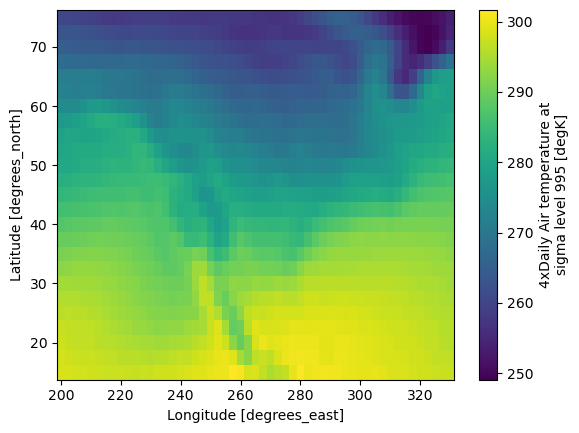

In [12]:
# Plot the mean temperature
mean_temperature.plot()
plt.show()

You can customize the appearance of plots by passing arguments to the `plot` method. For example, ypu can specify the color map, add labels, and set the figure size.

Text(0.5, 1.0, 'Mean Temperature')

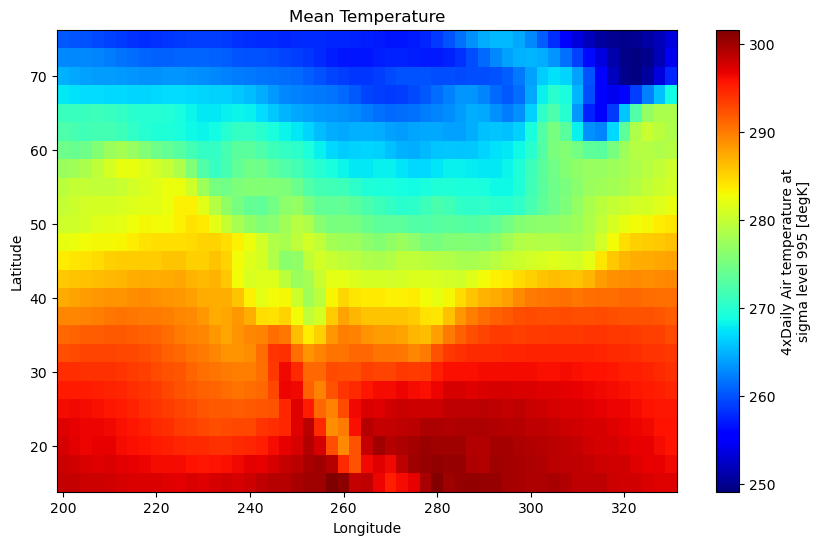

In [13]:
mean_temperature.plot(cmap="jet", figsize=(10,6))
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Mean Temperature")

You can also select a specific location using the `sel` method and plot a time series of temperature at that location.

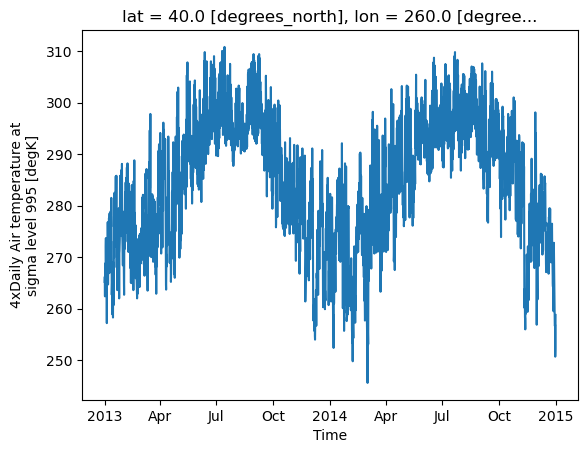

In [14]:
temperature.sel(lat=40.0, lon=260.0).plot()
plt.show()

## Working with Datasets
A `Dataset` is a collection of `DataArray` objects. It is useful when you need to work with multiple related variables.

In [15]:
# List all variables in the dataset
print(ds.data_vars)

Data variables:
    air      (time, lat, lon) float64 31MB 241.2 242.5 243.5 ... 296.2 295.7


In [16]:
# Access a DataArray from the Dataset
temperature = ds["air"]

In [17]:
# Perform operations on the Dataset
mean_temp_ds = ds.mean(dim="time")
mean_temp_ds

<xarray.Dataset> Size: 11kB
Dimensions:  (lat: 25, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
Data variables:
    air      (lat, lon) float64 11kB 260.4 260.2 259.9 ... 297.3 297.3 297.3
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

## Why Use Xarray?
Xarray is valuable for handling multi-dimensional data, especially in scientific applications. It provides metadata, dimension names, and coordinate labels, making it much easier to understand and manipulate data compared to raw NumPy arrays.

### Without Xarray (Using NumPy)
Here's how a task might look without Xarray, using NumPy arrays:

In [18]:
lat = ds.air.lat.data
lon = ds.air.lon.data
temp = ds.air.data

In [19]:
temp.shape

(2920, 25, 53)

In [20]:
lat.shape

(25,)

In [21]:
lon.shape

(53,)

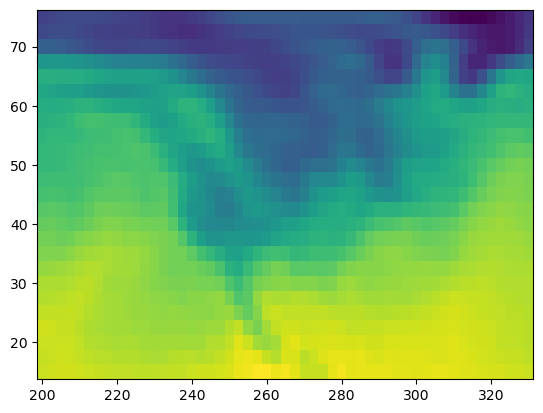

In [22]:
plt.figure()
plt.pcolormesh(lon, lat, temp[0, :, :])

While this approach works, it's not clear what `0` refers to (in this case, it's the first time step).

### With Xarray
With Xarray, you can use more intuitive and readable indexing with `sel` and `isel`:

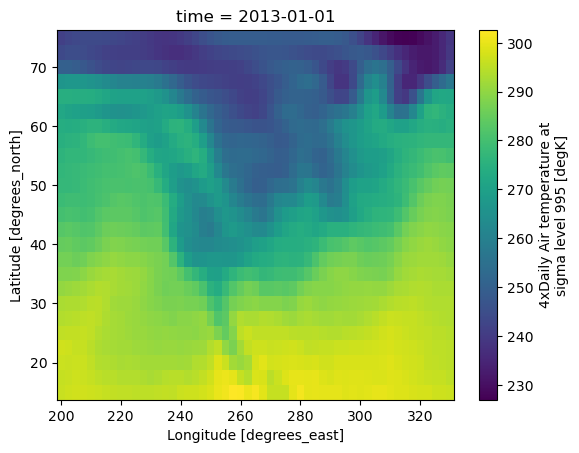

In [23]:
ds.air.isel(time=0).plot(x="lon")

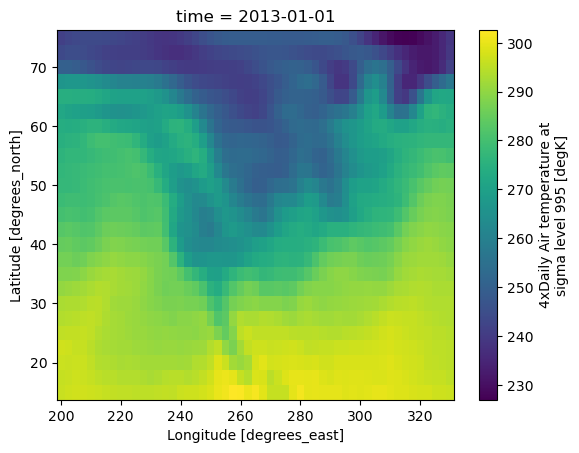

In [24]:
ds.air.sel(time="2013-01-01T00:00:00").plot(x="lon")

This example selects the first time step and plots it using labeled axes (`latl` and `lon`), which is much clearer.

## Advanced Indexing: Label va. Position-Based Indexing

### Label-based Indexing
You can use `.sel()` to select data based on the labels of coordinates, such as specific times or locations:

In [25]:
# Select all data from May 2013
ds.sel(time="2013-05")

<xarray.Dataset> Size: 1MB
Dimensions:  (lat: 25, time: 124, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 992B 2013-05-01 ... 2013-05-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 1MB 259.2 259.3 259.1 ... 297.6 297.5
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

In [26]:
# Slice iver time, selecting data between May and July 2013
ds.sel(time=slice("2013-05", "2013-07"))

<xarray.Dataset> Size: 4MB
Dimensions:  (lat: 25, time: 368, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 3kB 2013-05-01 ... 2013-07-31T18:00:00
Data variables:
    air      (time, lat, lon) float64 4MB 259.2 259.3 259.1 ... 299.5 299.7
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

### Position-based Indexing
Alternatively, you can use `.isel()` to select data based on the positions of coordinates:

In [27]:
# Select the first time step, second latitude, and third longitude
ds.air.isel(time=0, lat=2, lon=3)

<xarray.DataArray 'air' ()> Size: 8B
array(247.5)
Coordinates:
    lat      float32 4B 70.0
    lon      float32 4B 207.5
    time     datetime64[ns] 8B 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

## High-Level Computations with Xarray
Xarray offers several high-level operations that make common computations straightforward, such as `groupby`, `resample`, `rolling`, and `weighted`.

### GroupBy Operation
You can calculate statistics such as the seasonal mean of the dataset.

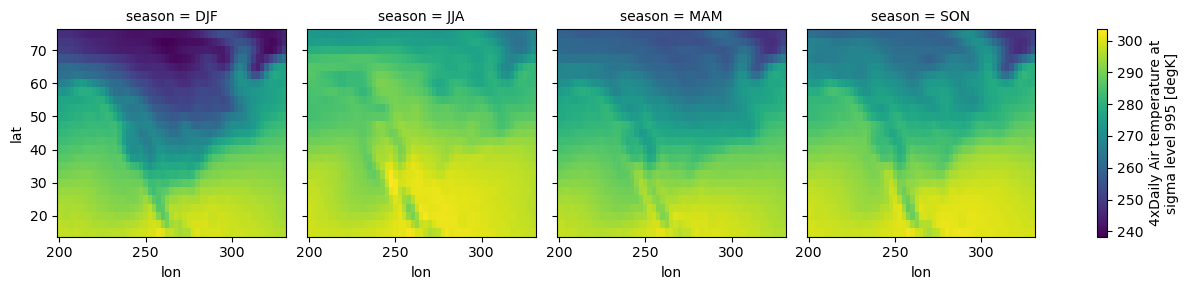

In [28]:
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean.air.plot(col="season")

### Computation with Weights
Xarray allows for weighted computations, useful in geospatial contexts where grid cells vary in size. For example, you can weight the mean of the dataset by cell area.

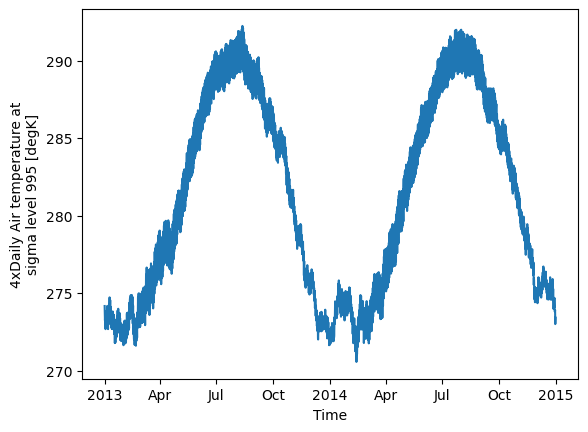

In [ ]:
cell_area = xr.ones_like(ds.air.lon) # Placeholder for actual area calculation
weighted_mean = ds.weighted(cell_area).mean(dim=["lon", "lat"])
weighted_mean.air.plot()

In [48]:
weights = np.cos(np.deg2rad(ds.air.lat))
weights.name = "weights"
weights


<xarray.DataArray 'weights' (lat: 25)> Size: 100B
0.2588 0.3007 0.342 0.3827 0.4226 0.4617 ... 0.9063 0.9239 0.9397 0.9537 0.9659
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
Attributes:
    standard_name:  latitude
    long_name:      Latitude
    units:          degrees_north
    axis:           Y

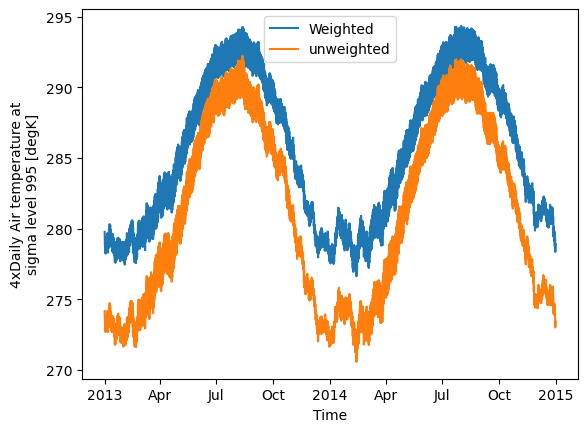

In [50]:
air_weigthed = ds.weighted(weights).mean(dim=["lon", "lat"])
air_weigthed.air.plot(label="Weighted")
ds.air.mean(("lon", "lat")).plot(label="unweighted")
plt.legend()


### Rolling Window Operation
Xarray supports rolling window operations, which are useful for smoothing time series data spatially or temporally. For example, you can smooth the temperature data spatially using a 5x5 window.

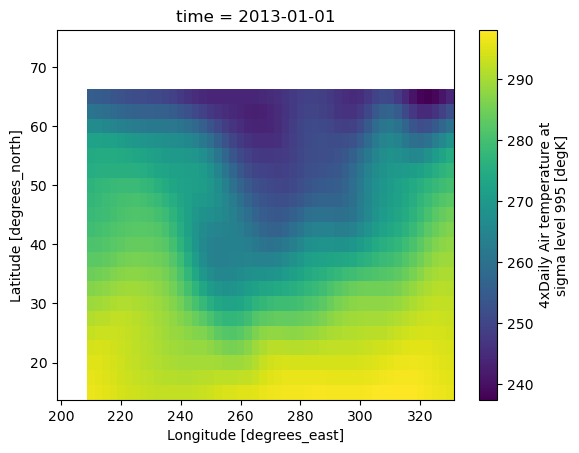

In [52]:
ds.air.isel(time=0).rolling(lat=5, lon=5).mean().plot()

Similarly, you can smooth the temperature data temporally using a 5-day window.

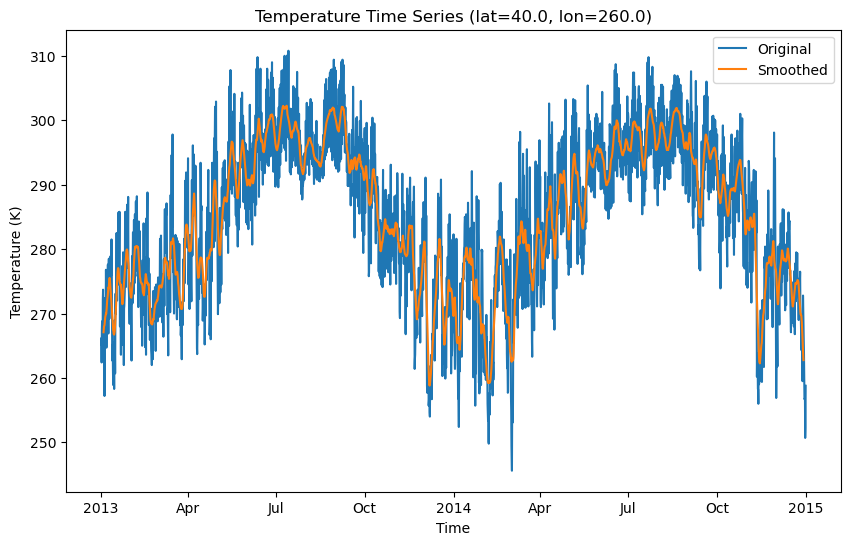

In [53]:
plt.figure(figsize=(10, 6))
# Select the time series at a specific latitude and longitude
temperature = ds.air.sel(lat=40.0, lon=260.0)

# Plot the original time series
temperature.plot(label="Original")

# Apply rolling mean smoothing with a window size of 20
smoothed_temperature = temperature.rolling(time=20, center=True).mean()

smoothed_temperature.plot(label="Smoothed")

# Add a title and labels
plt.title("Temperature Time Series (lat=40.0, lon=260.0)")
plt.xlabel("Time")
plt.ylabel("Temperature (K)")

plt.legend()
plt.show()

## Reading and Writing Files
Xarray supports many common scientific data formats, including netCDF and Zarr. You can read and write datasets to disk with a few simple commands.

### Writing to netCDF
To save a dataset as a netCDF file:

In [54]:
# Ensure air is in a floating-point format (float32 or float64)
ds["air"] = ds["air"].astype("float32")

# Save the dataset to NetCDF file
ds.to_netcdf("air_temperature.nc")

### Reading from netCDF
To load a dataset from a netCDF file:

In [55]:
loaded_data = xr.open_dataset("air_temperature.nc")
loaded_data

<xarray.Dataset> Size: 15MB
Dimensions:  (lat: 25, time: 2920, lon: 53)
Coordinates:
  * lat      (lat) float32 100B 75.0 72.5 70.0 67.5 65.0 ... 22.5 20.0 17.5 15.0
  * lon      (lon) float32 212B 200.0 202.5 205.0 207.5 ... 325.0 327.5 330.0
  * time     (time) datetime64[ns] 23kB 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 15MB ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...